In [1]:
%matplotlib inline

In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
autoreload 2

In [22]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting

from __future__ import division
#from sympy import init_printing

In [23]:
from estimation_class import *

In [24]:
est1 = HTWF_Estimation((0.0,1.0), (0.005, 20.0), (0.0,1.0), (0.005, 20.0), 142.85, yearly_w=True)
est1.Instructions()

Step 1. Call InitializeFunction() to get the production function stored.
Step 2. Call import_data('datafile') to get the data stored.
      (if you need the wages to be annulized, when creating
	     the HTWF_Estimation instance add yearly_w=True at the end)
Step 3. You are ready to go! Call StubbornObjectiveFunction with your initial set of parameters (4),
       number of grid points, tolerance, and a big initial guess for the firm)


In [25]:
est1.InitializeFunction()

In [26]:
est1.import_data('SPA05.csv', ID=False, weights=False, logs=False)

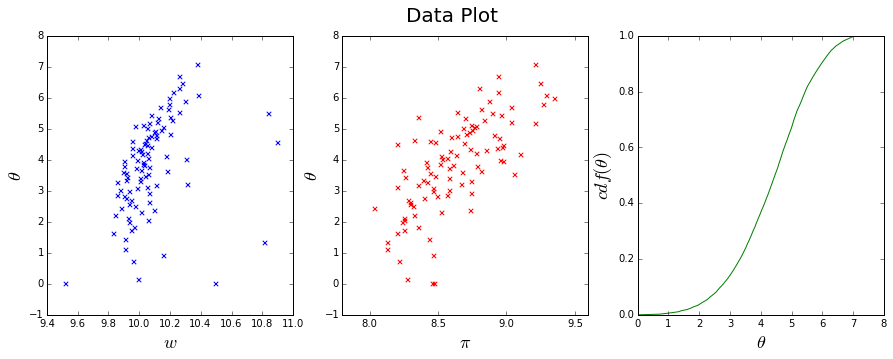

In [27]:
est1.Plot_data()

In [28]:
est1.Areureadyforthis()
est1.ready

True

In [46]:
F_params = {'omega_A':0.5, 'omega_B':0.75, 'sigma_A':0.8, 'Big_A':1e5}
functions_f_model = est1.Solve_Model(F_params, 2000.0, 'dopri5', 1e4, 1e-3)

Success! All workers and firms are matched


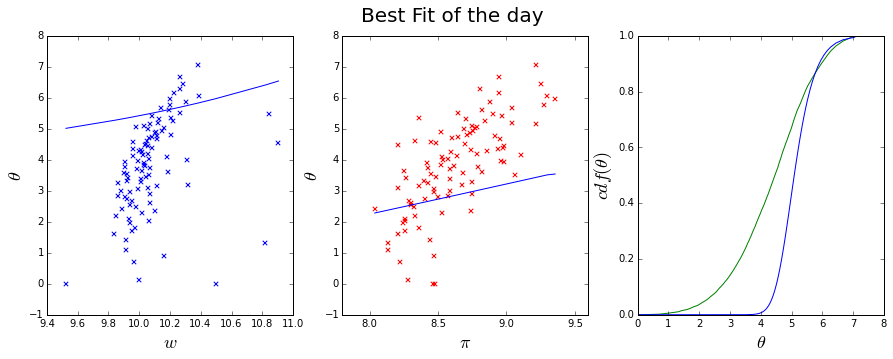

In [47]:
theta, wage, profit = est1.data

cdf_theta_data = []
r = 0.0
for i in range(len(theta)):
    r += theta[i]
    cdf_theta_data.append(r)
cdf_theta_data = np.array(cdf_theta_data)/cdf_theta_data[-1]

w_theta = functions_f_model[0]
pi_theta = functions_f_model[1]
thetas = functions_f_model[2]
xs_fm = functions_f_model[3]

from get_cdf import get_cdf, pdf_workers
cdf_model = get_cdf(thetas, xs_fm)

plt.figure(figsize=(15,5))
plt.suptitle('Best Fit of the day', fontsize=20)
plt.subplot(131)
plt.scatter(wage,theta, marker='x')
plt.plot(sorted(wage),np.log(w_theta(np.exp(sorted(wage)))))
plt.xlabel('$w$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(132)
plt.scatter(profit,theta, marker='x', color='r')
plt.plot(sorted(profit),np.log(pi_theta(np.exp(sorted(profit)))))
plt.xlabel('$\\pi$', fontsize=18)
plt.ylabel('$\\theta$', fontsize=18)

plt.subplot(133)
plt.plot(theta, cdf_theta_data, color='g')
plt.plot(theta,cdf_model(theta))
plt.ylabel('$cdf(\\theta)$', fontsize=18)
plt.xlabel('$\\theta$', fontsize=18)

plt.show()